In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from progressbar import progressbar
import scipy.stats
import statsmodels.stats.power as power
from functools import partial
import matplotlib.pyplot as plt
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})



# Intro

In this class we will build on the notebook:

[random_variables_and_python_review.ipynb](https://colab.research.google.com/drive/1YqFxxVEr190PjuMUsxKaFmaUS7Gaa1qN)


Our goal is to develop a portfolio of simulation, analytical, and graphical patterns for understanding random sampling and hypothesis tests. These will be building blocks for the next problem set and future ones!


# Exercises 1

1. In the "Normal distribution" section we simulated from 
`Xi = np.random.normal(loc=mu, scale=sigma ** 1, size=n)` and then plotted a histogram of the data. Let's repeat the same exercise but try two other distributions: Bernoulli$(p=0.25)$ and Exponential(scale=3).

2. In the section "Graphing a probability density function" it constructs the pdf of the Normal distribution. Overlay the Exponential pdf on the Exponential plot you made in the previous problem. Use the `scipy` docs to understand how to use `expon`.

3. In the section "Sampling distribution of $\bar{X}_n$" we generated Normally distributed samples and plotted the sample means. Repeat this exercise using your Bernoulli and Exponential distributions. The code is fairly modular. You don't need to make major changes to the code. You'll need to change the distribution. You also need to adjust the *parameters* on the Normal pdf-plotting function. Use the slides following "Sampling distribution of the mean" for this.

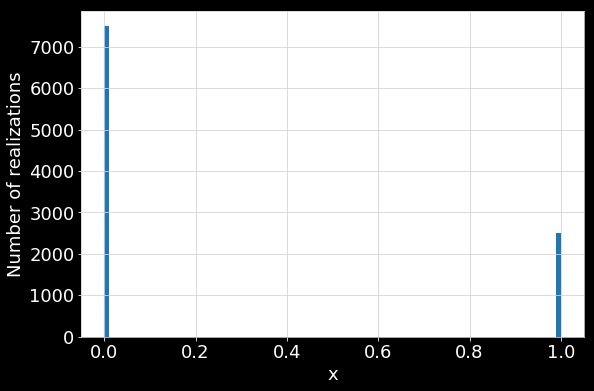

In [ ]:
#1
#Bernoulli
n = 1
p = .25 #probability of success
N = 10000 #number of trials
Xi = np.random.binomial(n, p, size= N)
ax = pd.Series(Xi).hist(bins=100, density=False, figsize=(9, 6))
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('Number of realizations', fontsize=18)
ax.tick_params(labelsize=18)

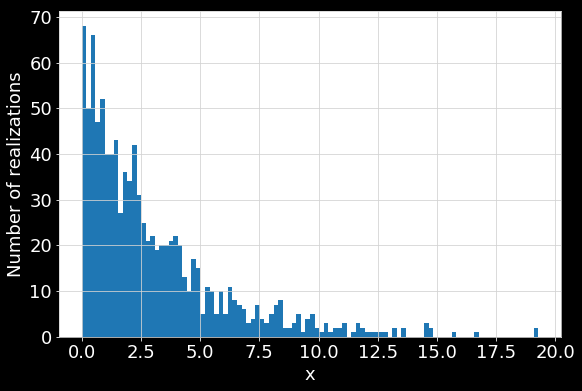

In [ ]:
#1
#Exponential
scale = 3
Xii = np.random.exponential(scale, size=1000)
axx = pd.Series(Xii).hist(bins=100, density=False, figsize=(9, 6))
axx.set_xlabel('x', fontsize=18)
axx.set_ylabel('Number of realizations', fontsize=18)
axx.tick_params(labelsize=18)

In [ ]:
#2
exp_pdf = partial(scipy.stats.expon.pdf, scale = scale)
grid_of_x_values = np.arange(0,10,0.01)
pdf = pd.DataFrame({'x': grid_of_x_values})
pdf['fx'] = pdf['x'].apply(exp_pdf)

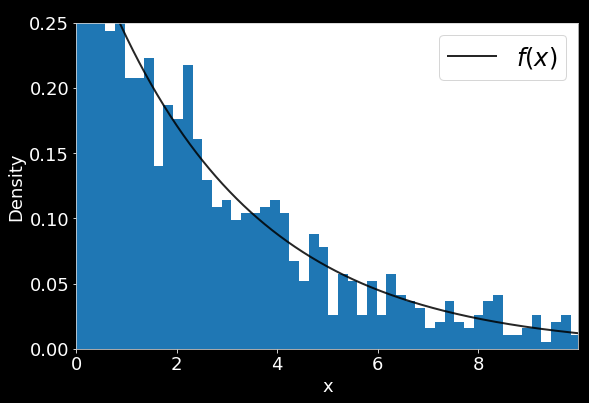

In [ ]:
axx = pd.Series(Xii).hist(bins=100, density=True)
pdf.plot(x='x', y='fx', ax=axx, linewidth=2, alpha=0.85, color='black', label=r'$f(x)$', figsize=(9, 6))
axx.set_ylim(0, 0.25)
axx.set_xlabel('x', fontsize=18)
axx.set_ylabel('Density', fontsize=18)
axx.legend(fontsize=24)
axx.tick_params(labelsize=18)
axx.set_title("Randomly generated values vs. theoretical distribution")
axx.grid(False)

In [ ]:
#3
#Bernoulli
#p - probability of success

def draw_one_sample(n = 1, p = .25, size=1000):
    """Randomly generate one dataset of size n"""
    Xi = np.random.binomial(n, p, size)
    return Xi



In [ ]:
m = 1000
n = 1
sample_means = []
# Warning `list_of_samples` is big. I don't recommend printing it to the screen.
# Your computer might lock up for a minute.
list_of_samples = [draw_one_sample(n=n) for _ in progressbar(range(0, m))]
sample_means = [sample.mean() for sample in list_of_samples]
sample_means = pd.Series(sample_means)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
print(sample_means.shape)

(1000,)


In [ ]:
sample_means.mean()

print("The simulated Xbar values have the expected theoretical distribution:")
print("Simulated mean of Xbar", sample_means.mean())
print("Theoretical expectation of Xbar", p)
print("\n")
print("Simulated standard deviation of Xbar", sample_means.std())
print("Theoretical standard devision of Xbar = ", ((p*(1-p)) / m) ** 0.5)

The simulated Xbar values have the expected theoretical distribution:
Simulated mean of Xbar 0.2504320000000001
Theoretical expectation of Xbar 0.25


Simulated standard deviation of Xbar 0.013698066031853301
Theoretical standard devision of Xbar =  0.013693063937629153


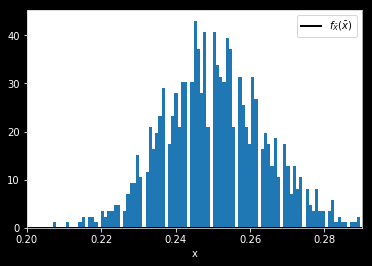

In [ ]:
ax = sample_means.hist(bins=100, density=True)

bern_pmf = partial(scipy.stats.binom.pmf, n =1 ,p =.25)
grid_of_x_values = np.arange(0.2, 0.3, 0.01)
pmf = pd.DataFrame({'x': grid_of_x_values})
pmf['fx'] = pmf['x'].apply(bern_pmf)
pmf.plot(x='x', y='fx', ax=ax, linewidth=2, color='black', label=r'$f_{\bar{X}}(\bar{x})$')

#axx = plt.subplots(1, 1)
#axx.plot(x, scipy.stats.bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')

In [ ]:
#3
#Expon
def draw_one_sample(scale = scale, n=1000):
    """Randomly generate one dataset of size n"""
    Xii = np.random.exponential(scale, size=1000)
    return Xii

In [ ]:
b = 5000  # Total number of *samples* to generate
n = 1000  # The number of data points in each sample

sample_means_exp = []  # We collect the 5000 Xbars here!


# Warning `list_of_samples` is big. I don't recommend printing it to the screen.
# Your computer might lock up for a minute.
list_of_samples_exp = [draw_one_sample(n=n) for _ in progressbar(range(0, b))]
sample_means_exp = [sample.mean() for sample in list_of_samples_exp]
sample_means_exp = pd.Series(sample_means_exp)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
print(sample_means_exp.shape)

(5000,)


In [ ]:
print("The simulated Xbar values have the expected theoretical distribution:")
print("Simulated mean of Xbar", sample_means_exp.mean())
print("Theoretical expectation of Xbar", scale)
print("\n")
print("Simulated standard deviation of Xbar", sample_means_exp.std())
print("Theoretical standard devision of Xbar = ", (scale**2/n)**0.5)

The simulated Xbar values have the expected theoretical distribution:
Simulated mean of Xbar 2.999001582251933
Theoretical expectation of Xbar 3


Simulated standard deviation of Xbar 0.09512703768933667
Theoretical standard devision of Xbar =  0.09486832980505137


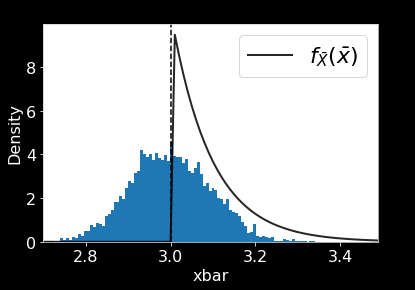

In [ ]:
axx = sample_means_exp.hist(bins=100, density=True)

expon_pdf = partial(scipy.stats.expon.pdf, loc=scale, scale= (scale**2/n)**0.5)
grid_of_x_values = np.arange(2.7, 3.5, 0.01)
pdf_exp = pd.DataFrame({'x': grid_of_x_values})
pdf_exp['fx'] = pdf_exp['x'].apply(expon_pdf)
pdf_exp.plot(x='x', y='fx', ax=axx, linewidth=2, alpha=0.85, color='black', label=r'$f_{\bar{X}}(\bar{x})$')


## Add a vertical marker line and labels
## This time we will graph the mean of the probability distribution.
axx.axvline(scale, color='black', linestyle='--')
axx.set_xlabel('xbar', fontsize=16)
axx.set_ylabel('Density', fontsize=16)
axx.set_title("Simulating the sampling distribution of the mean", fontsize=16)
axx.legend(fontsize=22)
axx.tick_params(labelsize=16)

# Exercises 2

In the section "Simulating other sample statistics for experiments" we simulated an experiment with two groups and estimated the ATE in each simulated sample.

1. In the histogram we plotted the distribution of these estimates. What is the standard deviation of these estimates (we also call this the standard error)? Use the `.std()` method.

2. The experiment in the notebook creates equal-sized treatment and control groups every time. Change the simulation so that the split is always 20% treatment, 80% control. Plot the histogram again and calculate the standard deviation of the estimates. Plot histograms of the sample means of each group individually. How does the percentage split affect the "noise" in our estimate of the ATE? What seems to be the best way to make our treatment and control groups?

3. Returning to the original simulation in the notebook, what is the probability (across repeated samples) that we would estimate the ATE to be larger than 0.7?

4. What is the probability that we would estimate the ATE to be more than two standard errors away from the true ATE (above or below)?


In [ ]:
def draw_one_sample_two_groups(ATE, mu, sigma, n, share_treatment):
    """Randomly generate one dataset of size n.
    
    args:
    ATE: The true average treatment effect
    expectation_Y0: The average of the outcome when there is no treatment, E[Y^0]
    N: The total sample size
    share_treatment: The proportion of N in the treatment group
    
    """
    units = np.arange(0, n)
    treatment_units = np.random.choice(units, int(len(units) * share_treatment), replace=False)
    df = pd.DataFrame({'i': units})
    # Set the treatment units to have d_i = 1
    df['d'] = df['i'].isin(treatment_units).astype('float')
    # The outcome of interest is Y. 
    # Let's make the treatment give a boost of 0.5!
    # The ATE will be 0.5!
    Yi = np.random.normal(loc=mu + ATE * df['d'], scale=sigma, size=n)
    df['y'] = Yi
    return df

  
def get_difference_in_means(df):
    # Calculate means by each group. Then take the difference.
    means = df.groupby('d')['y'].mean()
    diff = means.loc[1] - means.loc[0]

    N = df.shape[0]
    N_treatment = df['d'].sum()
    
    return {
        'N': N,
        'N_treatment': N_treatment,
        'mean_treatment': means.loc[1],
        'mean_control': means.loc[0],
        'diff': diff
    }

In [ ]:
mu = 1
sigma = 2

b = 5000  # Total number of *samples* to generate
n = 1000  # The number of data points in each sample

share_treatment = 0.5

ATE = 0.5
list_of_samples = [draw_one_sample_two_groups(ATE=ATE, mu=mu, sigma=sigma, n=n, share_treatment=share_treatment) for _ in progressbar(range(0, b))]
sample_results = pd.DataFrame([get_difference_in_means(sample) for sample in progressbar(list_of_samples)])

assert((sample_results['N'] == n).all())
assert((sample_results['N_treatment'] == int(n * share_treatment)).all())

100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:11 Time:  0:00:11


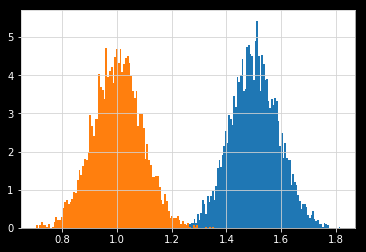

In [ ]:
sample_means_t = sample_results['mean_treatment']
sample_means_c = sample_results['mean_control']
ax = sample_means_t.hist(bins=100, density =True)
ax = sample_means_c.hist(bins=100, density =True)

###1

In [ ]:
print("Standard deviation of these estimates = ", sample_results['diff'].std())

Standard deviation of these estimates =  0.12522157480819607


###2

In [ ]:
mu = 1
sigma = 2

b = 5000  # Total number of *samples* to generate
n = 1000  # The number of data points in each sample

share_treatment = 0.2

ATE = 0.5
list_of_samples = [draw_one_sample_two_groups(ATE=ATE, mu=mu, sigma=sigma, n=n, share_treatment=share_treatment) for _ in progressbar(range(0, b))]
sample_results = pd.DataFrame([get_difference_in_means(sample) for sample in progressbar(list_of_samples)])
#ax = sample_means.hist(bins=100, density=True)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:11 Time:  0:00:11


Standard deviation of these estimates =  0.15854169437366938


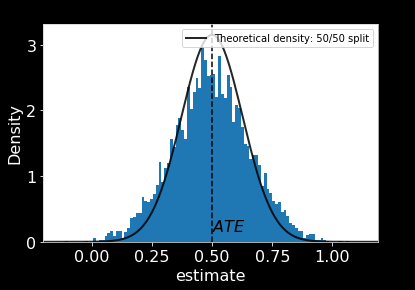

In [ ]:
ax = sample_results['diff'].hist(bins=100, density=True)

# Normal PDF assuming equally-sized treatment and control groups
normal_pdf = partial(scipy.stats.norm.pdf, loc=0.5, scale=(sigma * np.sqrt((2/n) + 2/n)))
grid_of_x_values = np.arange(-0.20, 1.2, 0.01)
pdf = pd.DataFrame({'x': grid_of_x_values})
pdf['fx'] = pdf['x'].apply(normal_pdf)
pdf.plot(x='x', y='fx', ax=ax, linewidth=2, alpha=0.85, color='black', label=r'Theoretical density: 50/50 split')


# Add a vertical marker line and labels
# This time we will graph the mean of the probability distribution.
ax.axvline(ATE, color='black', linestyle='--')
ax.text(x=ATE, y=pdf['fx'].max()*0.05, s=r'$ATE$', fontsize=16)
ax.set_xlabel('estimate', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_title("Simulating the sampling distribution of the mean", fontsize=16)
ax.legend(fontsize=10)
ax.tick_params(labelsize=16)

print("Standard deviation of these estimates = ", sample_results['diff'].std())

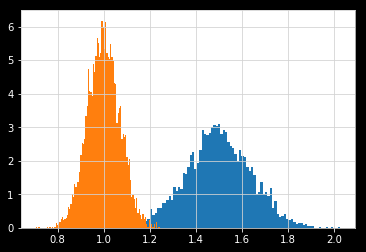

In [ ]:
sample_means_t = sample_results['mean_treatment']
sample_means_c = sample_results['mean_control']
ax = sample_means_t.hist(bins=100, density =True)
ax = sample_means_c.hist(bins=100, density =True)

###3

In [ ]:
mu = 1
sigma = 2
b = 5000 
n = 1000  
share_treatment = 0.5

ATE = 0.5
list_of_samples = [draw_one_sample_two_groups(ATE=ATE, mu=mu, sigma=sigma, n=n, share_treatment=share_treatment) for _ in progressbar(range(0, b))]
sample_results = pd.DataFrame([get_difference_in_means(sample) for sample in progressbar(list_of_samples)])

print('P[ATE > 0.7] =  ', (sample_results['diff'] > 0.7).mean())

100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:11 Time:  0:00:11


P[ATE > 0.7] =   5.84


In [ ]:
print('P[ATE > 0.7] =  ', (sample_results['diff'] > 0.7).mean())

P[ATE > 0.7] =   0.0584


###4

In [ ]:
twostderror = 2*sample_results['diff'].std() 

print('The probability that we would estimate the ATE to be more than 2 standard errors = ', (sample_results['diff'] < twostderror).mean() * 2)

The probability that we would estimate the ATE to be more than 2 standard errors =  0.0584


#Problem set 2
##Problem 1

In [ ]:
#Problemset2
#Problem 1
#Simulating t-tests under the null

In [ ]:
#1
#False positive rate is the probability that if the null hypothesis exists in our generated data, this hypothesis will be rejected in a particular test.

In [ ]:
#2
def get_difference_in_means_with_ttest(df, alpha):
    # Calculate means by each group. Then take the difference and do a t-test.
    means = df.groupby('d')['y'].mean()
    diff = means.loc[1] - means.loc[0]

    N = df.shape[0]
    N_treatment = df['d'].sum()
    ttest_results = get_ttest_analysis(df)
    reject_null = (ttest_results['p'] < alpha).astype('float')
    
    return {
        'N': N,
        'N_treatment': N_treatment,
        'mean_treatment': means.loc[1],
        'mean_control': means.loc[0],
        'diff': diff,
        't': ttest_results['t'],
        'p': ttest_results['p'],
        'reject_null': reject_null
    }

def get_simulation_results(expectation_Y0, ATE, share_treatment, n, B, sigma, alpha):
  params = dict(ATE=ATE, mu=expectation_Y0, n=n, share_treatment=share_treatment, sigma=sigma)
  list_of_samples = [draw_one_sample_two_groups(**params) for _ in progressbar(range(0, B))]
  simulations = pd.DataFrame([get_difference_in_means_with_ttest(sample, alpha) for sample in progressbar(list_of_samples)])
  
  # Return a summary of the simulations and the specified paramters.
  return {
      'diff_mean': simulations['diff'].mean(),
      'diff_std': simulations['diff'].std(),
      't_mean': simulations['t'].mean(),
      't_std': simulations['t'].std(),
      'alpha': alpha,
      'p_reject': simulations['reject_null'].mean(),
      'B': B,
      'N': simulations['N'].mean(),
      'N_treatment': simulations['N_treatment'].mean(),
      'share_treatment': share_treatment,
      'expectation_Y0': expectation_Y0,
      'sigma': sigma,
      'ATE': ATE
  }

In [ ]:
def get_ttest_analysis(df):    
    # A slower way to do this:
    treatment_group =  (df['d'] == 1)
    #diff = df.loc[treatment_group, 'y'].mean() - df.loc[~treatment_group, 'y'].mean()
    results = scipy.stats.ttest_ind(
        df.loc[treatment_group, 'y'], 
        df.loc[~treatment_group, 'y'])
    return {'t': results.statistic, 'p': results.pvalue}

In [ ]:
# Example: 10%

B = 5000  # Total number of *samples* to generate
N = 1000  # The number of data points in each sample
share_treatment = 0.1

expectation_Y0 = 3
ATE = 0
sigma = 1
alpha = 0.05

get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)



100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 100.0,
 'alpha': 0.05,
 'diff_mean': 0.0006991268871723702,
 'diff_std': 0.10529543723300865,
 'expectation_Y0': 3,
 'p_reject': 0.0484,
 'share_treatment': 0.1,
 'sigma': 1,
 't_mean': 0.006709844169710392,
 't_std': 0.9996063895571222}

In [ ]:
#Example 25%
share_treatment = 0.25
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 250.0,
 'alpha': 0.05,
 'diff_mean': 0.0020045569016096812,
 'diff_std': 0.07240504983708013,
 'expectation_Y0': 3,
 'p_reject': 0.0452,
 'share_treatment': 0.25,
 'sigma': 1,
 't_mean': 0.02752102799377722,
 't_std': 0.992212678774329}

In [ ]:
#Example 50%
share_treatment = 0.5
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:19 Time:  0:00:19
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.05,
 'diff_mean': 0.00011245766472553243,
 'diff_std': 0.06352909471823505,
 'expectation_Y0': 3,
 'p_reject': 0.0516,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 0.001844602385230272,
 't_std': 1.005295636280886}

In [ ]:
#Example 75%
share_treatment = 0.75
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 750.0,
 'alpha': 0.05,
 'diff_mean': -0.00015607490031827468,
 'diff_std': 0.07273341041915846,
 'expectation_Y0': 3,
 'p_reject': 0.042,
 'share_treatment': 0.75,
 'sigma': 1,
 't_mean': -0.0014848649426323567,
 't_std': 0.9971361621511616}

In [ ]:
#Example 90%
share_treatment = 0.9
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 900.0,
 'alpha': 0.05,
 'diff_mean': -0.0002722041991004971,
 'diff_std': 0.10658320234420275,
 'expectation_Y0': 3,
 'p_reject': 0.0506,
 'share_treatment': 0.9,
 'sigma': 1,
 't_mean': -0.002940741347300957,
 't_std': 1.0116243946267083}

In [ ]:
#3
# Example: sample 100

N = 100  # Total number of *samples* to generate
share_treatment = 0.5
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 100.0,
 'N_treatment': 50.0,
 'alpha': 0.05,
 'diff_mean': -0.004756812804969435,
 'diff_std': 0.20020579463721025,
 'expectation_Y0': 3,
 'p_reject': 0.05,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': -0.023544389815138622,
 't_std': 1.0166514290055433}

In [ ]:
# Example: sample 1000

N = 1000  # Total number of *samples* to generate
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.05,
 'diff_mean': -0.0007372257864917444,
 'diff_std': 0.06258095325492832,
 'expectation_Y0': 3,
 'p_reject': 0.0466,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': -0.011836001651654998,
 't_std': 0.9905364462611694}

In [ ]:
# Example: sample 10000

N = 10000  # Total number of *samples* to generate
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (5000 of 5000) |####################| Elapsed Time: 0:00:25 Time:  0:00:25


{'ATE': 0,
 'B': 5000,
 'N': 10000.0,
 'N_treatment': 5000.0,
 'alpha': 0.05,
 'diff_mean': -0.00011380639490502453,
 'diff_std': 0.02009373844543622,
 'expectation_Y0': 3,
 'p_reject': 0.0492,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': -0.005635423907557096,
 't_std': 1.0045581986962182}

In [ ]:
#4
#Initial with E[Y0] = 3 and sigma = 1
B = 5000  # Total number of *samples* to generate
N = 1000  # The number of data points in each sample
share_treatment = 0.5

expectation_Y0 = 3
ATE = 0
sigma = 1
alpha = 0.05

get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)



100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.05,
 'diff_mean': 0.0007725207955327574,
 'diff_std': 0.06354346078416402,
 'expectation_Y0': 3,
 'p_reject': 0.05,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 0.012081325759121521,
 't_std': 1.005242894107962}

In [ ]:
#New with E[Y0] = 10 and sigma = 20
expectation_Y0 = 10
sigma = 20

get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)


#Answer: Yes, it changed. Rate became more than 0.05

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:23 Time:  0:00:23


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.05,
 'diff_mean': -0.013173281131423943,
 'diff_std': 1.2279309799872207,
 'expectation_Y0': 10,
 'p_reject': 0.0448,
 'share_treatment': 0.5,
 'sigma': 20,
 't_mean': -0.010496783019725044,
 't_std': 0.9723368968897136}

In [ ]:
#5
# Example: sample 100

N = 100  # Total number of *samples* to generate
share_treatment = .5
alpha = .1 #false positive ratio
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 100.0,
 'N_treatment': 50.0,
 'alpha': 0.1,
 'diff_mean': 0.03727720918852556,
 'diff_std': 3.973282036235126,
 'expectation_Y0': 10,
 'p_reject': 0.1014,
 'share_treatment': 0.5,
 'sigma': 20,
 't_mean': 0.00808572427795693,
 't_std': 1.001996580426137}

In [ ]:
# Example: sample 1000

N = 1000  # Total number of *samples* to generate
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.1,
 'diff_mean': -0.0018527775101475172,
 'diff_std': 1.2500436596393103,
 'expectation_Y0': 10,
 'p_reject': 0.0956,
 'share_treatment': 0.5,
 'sigma': 20,
 't_mean': -0.0013336280843832076,
 't_std': 0.9890999055370281}

In [ ]:
# Example: sample 10000
N = 10000  # Total number of *samples* to generate
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (5000 of 5000) |####################| Elapsed Time: 0:00:25 Time:  0:00:25


{'ATE': 0,
 'B': 5000,
 'N': 10000.0,
 'N_treatment': 5000.0,
 'alpha': 0.1,
 'diff_mean': -9.4891583284614e-05,
 'diff_std': 0.39770028986000683,
 'expectation_Y0': 10,
 'p_reject': 0.0984,
 'share_treatment': 0.5,
 'sigma': 20,
 't_mean': -0.00016258043001916346,
 't_std': 0.9942508245596291}

In [ ]:
#Problem2
#1
#Power is the probability that test will give the particular ATE. In other words, it is the probability that reject H_0 (null hypothesis) 
#while H_1 (hypothesis that there is the effect) is true

In [ ]:
#2
# Example: alpha = 0.01

B = 5000  # Total number of *samples* to generate
N = 1000  # The number of data points in each sample
share_treatment = 0.5

expectation_Y0 = 3
ATE = 0.15
sigma = 1
alpha = 0.01

get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)



100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:23 Time:  0:00:23


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.01,
 'diff_mean': 0.1505790110763229,
 'diff_std': 0.06336700385298863,
 'expectation_Y0': 3,
 'p_reject': 0.4176,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.382806064774243,
 't_std': 1.004874709690087}

In [ ]:
# Example: alpha = 0.05
alpha = 0.05
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)



100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.05,
 'diff_mean': 0.1504284187386844,
 'diff_std': 0.06323994958186621,
 'expectation_Y0': 3,
 'p_reject': 0.6562,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.379480744512844,
 't_std': 1.0019868771616023}

In [ ]:
# Example: alpha = 0.1
alpha = 0.1
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:19 Time:  0:00:19
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.1,
 'diff_mean': 0.15029841672439917,
 'diff_std': 0.06495710758956381,
 'expectation_Y0': 3,
 'p_reject': 0.7608,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.3798537539746403,
 't_std': 1.0306713516164498}

In [ ]:
# Example: alpha = 0.15
alpha = 0.15
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:19 Time:  0:00:19
100% (5000 of 5000) |####################| Elapsed Time: 0:00:23 Time:  0:00:23


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.15,
 'diff_mean': 0.14935055205138842,
 'diff_std': 0.06366105485461683,
 'expectation_Y0': 3,
 'p_reject': 0.8176,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.363334299589911,
 't_std': 1.0091049110730788}

In [ ]:
# Example: alpha = 0.25
alpha = 0.25
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.25,
 'diff_mean': 0.14964272064533374,
 'diff_std': 0.06287657519676818,
 'expectation_Y0': 3,
 'p_reject': 0.8886,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.3671256772899194,
 't_std': 0.9946792549168485}

In [ ]:
# Example: alpha = 0.35
alpha = 0.35
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.35,
 'diff_mean': 0.14937725362282017,
 'diff_std': 0.06342406927649986,
 'expectation_Y0': 3,
 'p_reject': 0.922,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.3637135607888675,
 't_std': 1.0053926722286906}

In [ ]:
calculated_power0 = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.01,
    nobs1=n / 2,
    ratio=1.0,
)
calculated_power1 = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.05,
    nobs1=n / 2,
    ratio=1.0,
)
calculated_power2 = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.1,
    nobs1=n / 2,
    ratio=1.0,
)
calculated_power3 = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.15,
    nobs1=n / 2,
    ratio=1.0,
)
calculated_power4 = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.25,
    nobs1=n / 2,
    ratio=1.0,
)
calculated_power5 = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.35,
    nobs1=n / 2,
    ratio=1.0,
)
print("Calculated power (alpha = .01) = ", calculated_power0)
print("Calculated power (alpha = .05) = ", calculated_power1)
print("Calculated power (alpha = .10) = ", calculated_power2)
print("Calculated power (alpha = .15) = ", calculated_power3)
print("Calculated power (alpha = .25) = ", calculated_power4)
print("Calculated power (alpha = .35) = ", calculated_power5)

Calculated power (alpha = .01) =  0.4175904640137706
Calculated power (alpha = .05) =  0.6589069549458351
Calculated power (alpha = .10) =  0.7658793646274724
Calculated power (alpha = .15) =  0.8241285031361198
Calculated power (alpha = .25) =  0.8890907409329631
Calculated power (alpha = .35) =  0.9250576864541039


In [ ]:
df_power = pd.DataFrame({"Power": [calculated_power0,calculated_power1,calculated_power2,calculated_power3,calculated_power4,calculated_power5], 
                         "False positive rates": [0.01, 0.05, 0.1, 0.15, 0.25, 0.35] })
df_power

,Power,False positive rates
0,0.417590,0.01
1,0.658907,0.05
2,0.765879,0.10
3,0.824129,0.15
4,0.889091,0.25
5,0.925058,0.35


Text(0, 0.5, 'Power')

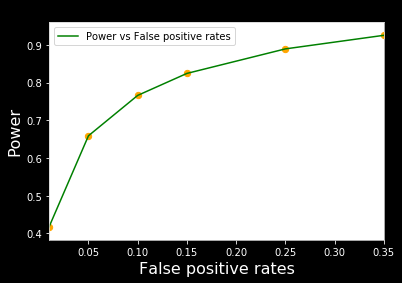

In [ ]:
# Plot 
df_power.plot(x = 'False positive rates', y = 'Power', color='green', title = 'Power vs False positive rates', label=r'Power vs False positive rates')
plt.scatter(df_power['False positive rates'], df_power['Power'], color='orange', s=40, marker='o')
plt.xlabel('False positive rates', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [ ]:
#3
#Example treatment 10%
B = 5000  # Total number of *samples* to generate
N = 1000  # The number of data points in each sample
share_treatment = 0.1

expectation_Y0 = 3
ATE = 0.15
sigma = 1
alpha = 0.05

get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)




100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:23 Time:  0:00:23


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 100.0,
 'alpha': 0.05,
 'diff_mean': 0.15169633142006878,
 'diff_std': 0.1051982948850953,
 'expectation_Y0': 3,
 'p_reject': 0.2986,
 'share_treatment': 0.1,
 'sigma': 1,
 't_mean': 1.4394378658371971,
 't_std': 0.9990070795223918}

In [ ]:
#Example treatment 25%
share_treatment = 0.25
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 250.0,
 'alpha': 0.05,
 'diff_mean': 0.15045954054815266,
 'diff_std': 0.07313705978486913,
 'expectation_Y0': 3,
 'p_reject': 0.5468,
 'share_treatment': 0.25,
 'sigma': 1,
 't_mean': 2.062177856552446,
 't_std': 1.0038293174879571}

In [ ]:
#Example treatment 50%
share_treatment = 0.5
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:19 Time:  0:00:19
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 500.0,
 'alpha': 0.05,
 'diff_mean': 0.14988339817552845,
 'diff_std': 0.06357160770036446,
 'expectation_Y0': 3,
 'p_reject': 0.6604,
 'share_treatment': 0.5,
 'sigma': 1,
 't_mean': 2.371634999899774,
 't_std': 1.008007216142836}

In [ ]:
#Example treatment 75%
share_treatment = 0.75
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 750.0,
 'alpha': 0.05,
 'diff_mean': 0.14845052330974506,
 'diff_std': 0.07315721211376261,
 'expectation_Y0': 3,
 'p_reject': 0.5256,
 'share_treatment': 0.75,
 'sigma': 1,
 't_mean': 2.0355712812261646,
 't_std': 1.0052744459998986}

In [ ]:
#Example treatment 90%
share_treatment = 0.9
get_simulation_results(expectation_Y0, ATE, share_treatment, N, B, sigma, alpha)

100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


{'ATE': 0.15,
 'B': 5000,
 'N': 1000.0,
 'N_treatment': 900.0,
 'alpha': 0.05,
 'diff_mean': 0.15469164567856705,
 'diff_std': 0.10585288045566103,
 'expectation_Y0': 3,
 'p_reject': 0.309,
 'share_treatment': 0.9,
 'sigma': 1,
 't_mean': 1.4678218770873477,
 't_std': 1.0048090430257866}

In [ ]:
tablepower = [
    dict(B = 5000, n = 1000, sigma = 1, alpha = .05, ATE = .15, expectation_Y0 = 3, share_treatment = .1),
    dict(B = 5000, n = 1000, sigma = 1, alpha = .05, ATE = .15, expectation_Y0 = 3, share_treatment = .25),
    dict(B = 5000, n = 1000, sigma = 1, alpha = .05, ATE = .15, expectation_Y0 = 3, share_treatment = .5),
    dict(B = 5000, n = 1000, sigma = 1, alpha = .05, ATE = .15, expectation_Y0 = 3, share_treatment = .75),
    dict(B = 5000, n = 1000, sigma = 1, alpha = .05, ATE = .15, expectation_Y0 = 3, share_treatment = .9),
]

In [ ]:
Finaltable = pd.DataFrame([get_simulation_results(**params) for params in tablepower])

100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22
100% (5000 of 5000) |####################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (5000 of 5000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22
100% (5000 of 5000) |####################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (5000 of 5000) |####################| Elapsed Time: 0:00:21 Time:  0:00:21


In [ ]:
Finaltable

,ATE,B,N,N_treatment,alpha,diff_mean,diff_std,expectation_Y0,p_reject,share_treatment,sigma,t_mean,t_std
0,0.15,5000,1000.0,100.0,0.05,0.147863,0.104070,3,0.2932,0.10,1,1.403898,0.989701
1,0.15,5000,1000.0,250.0,0.05,0.150567,0.073267,3,0.5442,0.25,1,2.062703,1.006271
2,0.15,5000,1000.0,500.0,0.05,0.151915,0.063410,3,0.6658,0.50,1,2.403098,1.005887
3,0.15,5000,1000.0,750.0,0.05,0.150787,0.073075,3,0.5406,0.75,1,2.065866,1.002963
4,0.15,5000,1000.0,900.0,0.05,0.151922,0.106397,3,0.3036,0.90,1,1.442380,1.011602


Text(0, 0.5, 'Power')

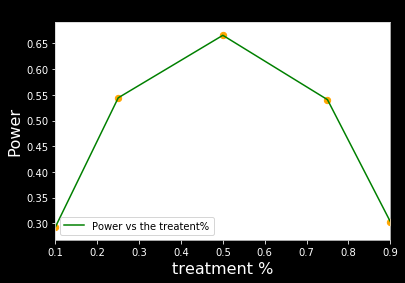

In [ ]:
Finaltable.plot(x = 'share_treatment', y = 'p_reject', color='green', title = 'Power vs the treatent%', label=r'Power vs the treatent%')
plt.scatter(Finaltable['share_treatment'], Finaltable['p_reject'], color='orange', s=40, marker='o')
plt.xlabel('treatment %', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [ ]:
#5
ATE = .15
alpha = .05

def power_function(nobs1):
    """Calculate power for the given sample size.
    
    Assumes that treatment and control groups are the same size.
    Assumes that the effect_size is ATE / sigma.
    Assumes that alpha (test size) is alpha.
    args:
    nobs1: The sample size of one group.
    """
    return power.tt_ind_solve_power( 
        effect_size=ATE / sigma,
        nobs1=nobs1,
        alpha=alpha,
        ratio=1.0  # ratio of sample sizes in treatment group vs. control group
    )

In [ ]:
print(power_function(100))
print(power_function(500))
print(power_function(1000))
print(power_function(2000))
#We could increase power by using more samples

0.18416304714327955
0.6589069549458351
0.9181183626575121
0.9973013416181205


In [ ]:
calculated_power = power.tt_ind_solve_power(
    effect_size=ATE / sigma,
    alpha=0.2,
    nobs1=n / 2,
    ratio=1.0,
)
calculated_power

0.8620928074875693

In [ ]:
#6
#10% of users
#reach at least 80% power
#a false positive rate of 0.05
